# Hourly energy demand generation and weather




Project link : https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather
This dataset contains 4 years of electrical consumption, generation, pricing, and weather data for Spain for 4 years.
There are 2 files 
1. energy_dataset : Time series generation of electricity in MW through various sources like Biomass, coal, solar etc
2. weather_features : Time series data of cities in spain and their weather data like humidity, temperature, pressure etc


Objective: Predict Spain's total energy demand
Data type: Time series data
Data shape: 
energy forecast : 35000 x 29 columns
weather features : 178k x 17 columns

Columns understanding (from kaggle )


Inpiration, from Kaggle:

Visualize the load and marginal supply curves.
What weather measurements, and cities influence most the electrical demand, prices, generation capacity?
Can we forecast 24 hours in advance better than the TSO?
Can we predict electrical price by time of day better than TSO?
Forecast intraday price or electrical demand hour-by-hour.
What is the next generation source to be activated on the load curve?

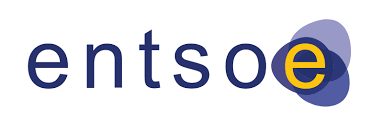



Official steps:
1. Pick a large real-world dataset from Kaggle (see the "Recommended Datasets" section below) and download it using opendatasets. Your training set should contain at least 50,000 rows and 5 columns of data.

2. Read the dataset description, understand the problem statement and describe the modeling objective clearly. You can also browse through existing notebooks created by others for inspiration.

3. Perform exploratory data analysis, gather insights about the data, perform feature engineering, create a training-validation split, and prepare the data for modeling.

4. Train & evaluate different machine learning models, tune hyperparameters and reduce overfitting to improve the model.

5. Report the final performance of your best model(s), show sample predictions, and save model weights. Summarize your work, share links to references, and suggest ideas for future work.

6. Publish your Jupyter notebook to Jovian, make a submission below and share your project with the community. Optionally, you may also write a blog post and contribute to the Jovian official blog.

Evaluation Criteria
Your submission must satisfy the following criteria:

1. Training set should contain at least 50,000 rows of data and 5 columns
2. Notebook must include all the steps listed in the project guidelines above
3. Notebook must be executed end-to-end with error-free outputs for all cells
4. You must train at least 2 different types of machine learning models
5. You must tune at least 2 different hyperparameters for your chosen model
6. Your model's performance on the validation set must be reasonably good
7. Your project must be documented extensively using markdown cells
8. Notebook must include references to relevant notebooks/tutorials/documentation sites
9. Your notebook must not be plagiarized (i.e., directly copied) from another project

1. Load dataset using opendatasets from Kaggle
2. analyze files energy_dataset and weather_features and try to figure out a way to combine features. Find target and input columns.
3. EDA on the data (find correlations, graphs, missing data, inf, NANs, means, outliers etc)
4. Feature engineering (create new columns from Date, use uncertianity in a different way. Target column: Price_day or price_actual or total_load_forecast, total_load_actual)
5. Imputation on numerical cols, No categorical columns so no one hot encoding required.
6. Train-val-test split (70:10:20)
7. Use Linear regression (fit ax1+bx2+cx3+... = y), random forest, Gradient boosting, Light GBM.
8. Tune hyperparameters of random forest, GBM, light GBM.
9. Find out accuracies and figure out the best model
10. Sample predictions on some small data, features importances(weights)
11. Summarize the findings 


In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
import jovian
jovian.set_project('python-course-project')
jovian.set_colab_id('1cholSIHuyMFdv9Gbz6VbrpCa7PpSzbxA')

# Downloading the data


In [2]:
import os
import opendatasets as od
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
from dateutil.parser import parse
from dateutil.tz import tzoffset

In [3]:
od.download('https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather')

Skipping, found downloaded files in ".\energy-consumption-generation-prices-and-weather" (use force=True to force download)


In [4]:
os.listdir('energy-consumption-generation-prices-and-weather/')

['energy_dataset.csv', 'weather_features.csv']

In [5]:
energy_dataset = pd.read_csv('energy-consumption-generation-prices-and-weather/energy_dataset.csv',skipinitialspace=True)
weather_features = pd.read_csv('energy-consumption-generation-prices-and-weather/weather_features.csv',skipinitialspace=True
)

In [6]:
energy_dataset.rename(columns={'time' : 'datetime'}, inplace=True)
weather_features.rename(columns={'dt_iso' : 'datetime'}, inplace=True)

In [7]:
energy_dataset

datetime  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  \
0                        0.0                                         NaN   
1                        0.0                                         NaN   
2                        0.0                                         NaN   
3                        0.0                                         NaN   
4                        0.0                                         NaN   
...                      ...       

In [8]:
weather_features

datetime city_name     temp  temp_min  temp_max  \
0       2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475   
1       2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475   
2       2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686   
3       2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686   
4       2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686   
...                           ...       ...      ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  287.760   287.150   288.150   
178392  2018-12-31 20:00:00+01:00   Seville  285.760   285.150   286.150   
178393  2018-12-31 21:00:00+01:00   Seville  285.150   285.150   285.150   
178394  2018-12-31 22:00:00+01:00   Seville  284.150   284.150   284.150   
178395  2018-12-31 23:00:00+01:00   Seville  283.970   282.150   285.150   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0           1001        77           1        62      0.0      0.0      0.0   
1           1001        77           1        62      0.0      0.0      0.0   
2           1002        78           0        23      0.0      0.0      0.0   
3           1002        78           0        23      0.0      0.0      0.0   
4           1002        78           0        23      0.0      0.0      0.0   
...          ...       ...         ...       ...      ...      ...      ...   
178391      1028        54           3        30      0.0      0.0      0.0   
178392      1029        62           3        30      0.0      0.0      0.0   
178393      1028        58           4        50      0.0      0.0      0.0   
178394      1029        57           4        60      0.0      0.0      0.0   
178395      1029        70           3        50      0.0      0.0      0.0   

        clouds_all  weather_id weather_main weather_description weather_icon  
0                0         800        clear        sky is clear          01n  
1                0         800        clear        sky is clear          01n  
2                0         800        clear        sky is clear          01n  
3                0         800        clear        sky is clear          01n  
4                0         800        clear        sky is clear          01n  
...            ...         ...          ...                 ...          ...  
178391           0         800        clear        sky is clear          01n  
178392           0         800        clear        sky is clear          01n  
178393           0         800        clear        sky is clear          01n  
178394           0         800        clear        sky is clear          01n  
178395           0         800        clear        sky is clear          01n  

[178396 rows x 17 columns]

In [9]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aroraarjun1996/elctrical-demand-price-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction


'https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction'

# Preprocessing and feature engineering

In [10]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   datetime                                     35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [11]:
weather_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   datetime             178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [12]:
energy_dataset.datetime.min(), energy_dataset.datetime.max(), weather_features.datetime.min(), weather_features.datetime.max()

('2015-01-01 00:00:00+01:00',
 '2018-12-31 23:00:00+01:00',
 '2015-01-01 00:00:00+01:00',
 '2018-12-31 23:00:00+01:00')

In [13]:
weather_features.datetime.nunique(), energy_dataset.datetime.nunique(), weather_features.datetime.shape

(35064, 35064, (178396,))

In [14]:
weather_features.city_name.unique()

array(['Valencia', 'Madrid', 'Bilbao', 'Barcelona', 'Seville'],
      dtype=object)

In [15]:
weather_features[weather_features['datetime'] == '2015-01-01 02:00:00+01:00']
# 5 rows for each city
# so 35064*5 = 175320

datetime  city_name        temp    temp_min  \
2       2015-01-01 02:00:00+01:00   Valencia  269.686000  269.686000   
35147   2015-01-01 02:00:00+01:00     Madrid  266.186000  266.186000   
71414   2015-01-01 02:00:00+01:00     Bilbao  269.251688  269.251688   
107365  2015-01-01 02:00:00+01:00  Barcelona  281.286000  281.286000   
142841  2015-01-01 02:00:00+01:00    Seville  274.086000  274.086000   

          temp_max  pressure  humidity  wind_speed  wind_deg  rain_1h  \
2       269.686000      1002        78           0        23      0.0   
35147   266.186000       971        64           1       273      0.0   
71414   269.251688      1036        97           1       224      0.0   
107365  281.286000      1036       100           7        48      0.0   
142841  274.086000      1039        71           3        27      0.0   

        rain_3h  snow_3h  clouds_all  weather_id weather_main  \
2           0.0      0.0           0         800        clear   
35147       0.0      0.0           0         800        clear   
71414       0.0      0.0           0         800        clear   
107365      0.0      0.0           0         800        clear   
142841      0.0      0.0           0         800        clear   

       weather_description weather_icon  
2             sky is clear          01n  
35147         sky is clear          01n  
71414         sky is clear           01  
107365        sky is clear          01n  
142841        sky is clear          01n

In [16]:
#So there are duplicate rows in the data : 178396 - 175320 = 3076 duplicate rows


In [17]:

#Let's extract date level columns from datetime

def split_date(df):
    df['Date'] = pd.to_datetime(df['date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    df['dayofweek'] = df.Date.dt.dayofweek


In [18]:
#city related modifications
weather_val = weather_features[weather_features['city_name'] == 'Valencia'].drop_duplicates(subset='datetime')
weather_bil = weather_features[weather_features['city_name'] == 'Bilbao'].drop_duplicates(subset='datetime')
weather_bar = weather_features[weather_features['city_name'] == 'Barcelona'].drop_duplicates(subset='datetime')
weather_sev = weather_features[weather_features['city_name'] == 'Seville'].drop_duplicates(subset='datetime')
weather_mad = weather_features[weather_features['city_name'] == 'Madrid'].drop_duplicates(subset='datetime')

weather_val.shape, weather_mad.shape, weather_bil.shape, weather_bar.shape, weather_sev.shape

((35064, 17), (35064, 17), (35064, 17), (35064, 17), (35064, 17))

In [19]:
print(weather_bar.datetime.min(), energy_dataset.datetime.min(), weather_bar.datetime.max(), energy_dataset.datetime.max())

print(weather_bil.datetime.min(), energy_dataset.datetime.min(), weather_bil.datetime.max(), energy_dataset.datetime.max())

print(weather_mad.datetime.min(), energy_dataset.datetime.min(), weather_mad.datetime.max(), energy_dataset.datetime.max())

print(weather_sev.datetime.min(), energy_dataset.datetime.min(), weather_sev.datetime.max(), energy_dataset.datetime.max())

print(weather_val.datetime.min(), energy_dataset.datetime.min(), weather_val.datetime.max(), energy_dataset.datetime.max())

2015-01-01 00:00:00+01:00 2015-01-01 00:00:00+01:00 2018-12-31 23:00:00+01:00 2018-12-31 23:00:00+01:00
2015-01-01 00:00:00+01:00 2015-01-01 00:00:00+01:00 2018-12-31 23:00:00+01:00 2018-12-31 23:00:00+01:00
2015-01-01 00:00:00+01:00 2015-01-01 00:00:00+01:00 2018-12-31 23:00:00+01:00 2018-12-31 23:00:00+01:00
2015-01-01 00:00:00+01:00 2015-01-01 00:00:00+01:00 2018-12-31 23:00:00+01:00 2018-12-31 23:00:00+01:00
2015-01-01 00:00:00+01:00 2015-01-01 00:00:00+01:00 2018-12-31 23:00:00+01:00 2018-12-31 23:00:00+01:00


Both these have the same time dimensions and start and end hours. Weather has multiple rows of the same hours as it has the data for multiple cities recorded. So we can join these two tables Weather left join energy

In [20]:
# But first, let's find the null values

# NA or Null values


In [21]:
weather_features.isna().sum()

datetime               0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [22]:
energy_dataset.isna().sum()

datetime                                           0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [23]:
#Let's drop the blank columns [generation hydro pumped storage aggregated, forecast wind offshore eday ahead]

In [24]:
energy_dataset.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'],axis = 1, inplace=True)

In [25]:
energy_dataset.isna().sum()

datetime                                        0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18


In [26]:
energy_weather_mad = pd.merge(energy_dataset, weather_mad, on = 'datetime')

In [27]:
#Time columns modification functions
energy_weather_mad[['time', 'timezone']] = energy_weather_mad['datetime'].str.split("+", expand=True)
energy_weather_mad[['date', 'time_hours']] = energy_weather_mad['time'].str.split(" ", expand=True)
split_date(energy_weather_mad)
del energy_weather_mad['timezone']

In [28]:
energy_weather_mad.sample(10)

datetime  generation biomass  \
26105  2017-12-23 17:00:00+01:00               362.0   
26165  2017-12-26 05:00:00+01:00               338.0   
22242  2017-07-15 19:00:00+02:00               374.0   
5143   2015-08-03 08:00:00+02:00               456.0   
9424   2016-01-28 16:00:00+01:00               511.0   
8542   2015-12-22 22:00:00+01:00               481.0   
34718  2018-12-17 14:00:00+01:00               298.0   
22366  2017-07-20 23:00:00+02:00               397.0   
32153  2018-09-01 18:00:00+02:00               284.0   
14722  2016-09-05 11:00:00+02:00               276.0   

       generation fossil brown coal/lignite  \
26105                                 865.0   
26165                                   0.0   
22242                                 594.0   
5143                                    0.0   
9424                                  914.0   
8542                                  632.0   
34718                                 240.0   
22366                                 878.0   
32153                                 625.0   
14722                                 125.0   

       generation fossil coal-derived gas  generation fossil gas  \
26105                                 0.0                 4291.0   
26165                                 0.0                 4369.0   
22242                                 0.0                 6980.0   
5143                                  0.0                 4762.0   
9424                                  0.0                 6314.0   
8542                                  0.0                 6701.0   
34718                                 0.0                10817.0   
22366                                 0.0                 8749.0   
32153                                 0.0                 8813.0   
14722                                 0.0                 4380.0   

       generation fossil hard coal  generation fossil oil  \
26105                       4855.0                  239.0   
26165                       1564.0                  244.0   
22242                       4949.0                  281.0   
5143                        1996.0                  227.0   
9424                        5589.0                  413.0   
8542                        6270.0                  416.0   
34718                       5207.0                  286.0   
22366                       4628.0                  360.0   
32153                       6655.0                  361.0   
14722                       1602.0                  287.0   

       generation fossil oil shale  generation fossil peat  \
26105                          0.0                     0.0   
26165                          0.0                     0.0   
22242                          0.0                     0.0   
5143                           0.0                     0.0   
9424                           0.0                     0.0   
8542                           0.0                     0.0   
34718                          0.0                     0.0   
22366                          0.0                     0.0   
32153                          0.0                     0.0   
14722                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage consumption  \
26105                    0.0                                          0.0   
26165                    0.0                                       3219.0   
22242                    0.0                                          0.0   
5143                     0.0                                       1756.0   
9424                     0.0                                          0.0   
8542                     0.0                                          0.0   
34718                    0.0                                          1.0   
22366                    0.0                                        361.0   
32153                    0.0                                          0.0   
14722          

# Split test-train for madrid


In [29]:
train_madrid_df = energy_weather_mad.loc[energy_weather_mad['Year'] < 2018]
test_madrid_df = energy_weather_mad.loc[energy_weather_mad['Year'] == 2018]

In [30]:
train_madrid_df.Year.unique(), test_madrid_df.Year.unique()

(array([2015, 2016, 2017], dtype=int64), array([2018], dtype=int64))

In [31]:
train_madrid_df['price actual'].mean(), test_madrid_df['price actual'].mean()

(56.03392259732378, 63.43939269406376)

In [32]:
train_madrid_df['total load actual'].mean(), test_madrid_df['total load actual'].mean()

(28574.69813475447, 29063.609385704498)

In [33]:
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

In [34]:
px.line(data_frame=train_madrid_df, x = 'Date', y = 'price actual', color='Year')

In [35]:
px.line(data_frame=test_madrid_df, x = 'Date', y = 'price actual', color='Year')

In [36]:
train_madrid_df

datetime  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
26299  2017-12-31 19:00:00+01:00               273.0   
26300  2017-12-31 20:00:00+01:00               267.0   
26301  2017-12-31 21:00:00+01:00               268.0   
26302  2017-12-31 22:00:00+01:00               277.0   
26303  2017-12-31 23:00:00+01:00               278.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
26299                                   0.0   
26300                                   0.0   
26301                                   0.0   
26302                                   0.0   
26303                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
26299                                 0.0                 3101.0   
26300                                 0.0                 3022.0   
26301                                 0.0                 3205.0   
26302                                 0.0                 3266.0   
26303                                 0.0                 3552.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
26299                        806.0                  198.0   
26300                        764.0                  196.0   
26301                        784.0                  184.0   
26302                        791.0                  195.0   
26303                        926.0                  196.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
26299                          0.0                     0.0   
26300                          0.0                     0.0   
26301                          0.0                     0.0   
26302                          0.0                     0.0   
26303                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage consumption  \
0                        0.0                                        863.0   
1                        0.0                                        920.0   
2                        0.0                                       1164.0   
3                        0.0                                       1503.0   
4                        0.0                                       1826.0   
...                      ... 

In [37]:
train_madrid_df.columns

Index(['datetime', 'generation biomass',
       'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual', 'city_name',
       'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'weather_id',
     

In [38]:
train_madrid_df.columns[1:]

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind onshore day ahead', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual', 'city_name',
       'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', '

In [39]:
train_madrid_df.corr()['price actual'].abs().sort_values(ascending=False)

price actual                                   1.000000
price day ahead                                0.726695
generation fossil hard coal                    0.538604
generation fossil gas                          0.457143
total load forecast                            0.446151
total load actual                              0.445556
generation fossil brown coal/lignite           0.434971
generation hydro pumped storage consumption    0.407546
generation fossil oil                          0.351166
generation hydro run-of-river and poundage     0.249364
WeekOfYear                                     0.235521
Month                                          0.234775
wind_speed                                     0.233690
generation biomass                             0.229490
forecast wind onshore day ahead                0.204109
generation wind onshore                        0.203215
dayofweek                                      0.188931
generation other renewable                     0

In [40]:
target_cols = ['price actual']

In [41]:
input_cols = list(train_madrid_df.columns)
input_cols.remove('price actual')
input_cols.remove('datetime')

In [42]:
input_cols

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'city_name',
 'temp',
 'temp_min',
 'temp_max',
 'pressure',
 'humidity',
 'wind_speed',
 'wind_deg',
 'rain_1h',
 'rain_3h',
 'snow_3h',
 'clouds_all',
 'weather_id',
 'weather_main',
 'weather_description',
 'weather_icon',
 'time',
 'date',
 'time_hours',
 'Date',


Input cols should include the major generation values by various sources and date/time values. Also the weather conditions matter a lot. Remove the Nan correlated values. 

In [43]:
train_inputs = train_madrid_df[input_cols].copy()
train_targets = train_madrid_df[target_cols].copy()

In [44]:
test_inputs = test_madrid_df[input_cols].copy()
test_targets = test_madrid_df[target_cols].copy()

In [45]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['Year', 'Day','WeekOfYear','Month','dayofweek', 'weather_main', 'weather_description']


In [46]:
for x in categorical_cols:
    if x in numeric_cols:
        numeric_cols.remove(x)

In [47]:
numeric_cols

['generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'temp',
 'temp_min',
 'temp_max',
 'pressure',
 'humidity',
 'wind_speed',
 'wind_deg',
 'rain_1h',
 'rain_3h',
 'snow_3h',
 'clouds_all',
 'weather_id']

In [48]:
train_inputs

generation biomass  generation fossil brown coal/lignite  \
0                   447.0                                 329.0   
1                   449.0                                 328.0   
2                   448.0                                 323.0   
3                   438.0                                 254.0   
4                   428.0                                 187.0   
...                   ...                                   ...   
26299               273.0                                   0.0   
26300               267.0                                   0.0   
26301               268.0                                   0.0   
26302               277.0                                   0.0   
26303               278.0                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
26299                                 0.0                 3101.0   
26300                                 0.0                 3022.0   
26301                                 0.0                 3205.0   
26302                                 0.0                 3266.0   
26303                                 0.0                 3552.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
26299                        806.0                  198.0   
26300                        764.0                  196.0   
26301                        784.0                  184.0   
26302                        791.0                  195.0   
26303                        926.0                  196.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
26299                          0.0                     0.0   
26300                          0.0                     0.0   
26301                          0.0                     0.0   
26302                          0.0                     0.0   
26303                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage consumption  \
0                        0.0                                        863.0   
1                        0.0                                        920.0   
2                        0.0                                       1164.0   
3                        0.0                                       1503.0   
4                        0.0                                       1826.0   
...                      ...                                          ...   
26299                    0.0                                        311.0   
26300                    0.0                                        769.0   
26301                    0.0                                       1219.0   
26302                    0.0                                       2252.0   
26303                    0.0                                

In [49]:
train_targets

price actual
0             65.41
1             64.92
2             64.48
3             59.32
4             56.04
...             ...
26299         39.90
26300         39.54
26301         32.90
26302         23.85
26303         23.95

[26304 rows x 1 columns]

In [50]:
test_inputs

generation biomass  generation fossil brown coal/lignite  \
26304               282.0                                   0.0   
26305               275.0                                   0.0   
26306               278.0                                   0.0   
26307               278.0                                   0.0   
26308               279.0                                   0.0   
...                   ...                                   ...   
35059               297.0                                   0.0   
35060               296.0                                   0.0   
35061               292.0                                   0.0   
35062               293.0                                   0.0   
35063               290.0                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
26304                                 0.0                 3471.0   
26305                                 0.0                 3269.0   
26306                                 0.0                 3541.0   
26307                                 0.0                 3450.0   
26308                                 0.0                 3318.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
26304                        996.0                  194.0   
26305                        959.0                  191.0   
26306                       1014.0                  191.0   
26307                       1043.0                  191.0   
26308                       1063.0                  191.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
26304                          0.0                     0.0   
26305                          0.0                     0.0   
26306                          0.0                     0.0   
26307                          0.0                     0.0   
26308                          0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage consumption  \
26304                    0.0                                       2094.0   
26305                    0.0                                       2115.0   
26306                    0.0                                       2037.0   
26307                    0.0                                       2126.0   
26308                    0.0                                       2580.0   
...                      ...                                          ...   
35059                    0.0                                          1.0   
35060                    0.0                                          1.0   
35061                    0.0                                         50.0   
35062                    0.0                                        108.0   
35063                    0.0                                

In [51]:
test_targets

price actual
26304         20.76
26305         19.02
26306         17.90
26307         20.88
26308         18.83
...             ...
35059         77.02
35060         76.16
35061         74.30
35062         69.89
35063         69.88

[8760 rows x 1 columns]

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aroraarjun1996/elctrical-demand-price-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction


'https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction'

# Imputing missing numeric values


In [53]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'mean').fit(energy_weather_mad[numeric_cols])

In [54]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [55]:
test_inputs[numeric_cols].isna().sum()


generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onshore                        0
forecast solar day a

# Scaling Numeric Features

In [56]:
from sklearn.preprocessing import MinMaxScaler


In [57]:
scaler = MinMaxScaler().fit(energy_weather_mad[numeric_cols])


In [58]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [59]:
train_inputs.describe().loc[['min', 'max']]

generation biomass  generation fossil brown coal/lignite  \
min                 0.0                                   0.0   
max                 1.0                                   1.0   

     generation fossil coal-derived gas  generation fossil gas  \
min                                 0.0               0.075771   
max                                 0.0               1.000000   

     generation fossil hard coal  generation fossil oil  \
min                          0.0                    0.0   
max                          1.0                    1.0   

     generation fossil oil shale  generation fossil peat  \
min                          0.0                     0.0   
max                          0.0                     0.0   

     generation geothermal  generation hydro pumped storage consumption  \
min                    0.0                                          0.0   
max                    0.0                                          1.0   

     generation hydro run-of-river and poundage  \
min                                      0.0000   
max                                      0.9695   

     generation hydro water reservoir  generation marine  generation nuclear  \
min                          0.000000                0.0            0.000000   
max                          0.965152                0.0            0.999859   

     generation other  generation other renewable  generation solar  \
min               0.0                    0.000000               0.0   
max               1.0                    0.966387               1.0   

     generation waste  generation wind offshore  generation wind onshore  \
min               0.0                       0.0                      0.0   
max               1.0                       0.0                      1.0   

     forecast solar day ahead  forecast wind onshore day ahead  \
min                       0.0                              0.0   
max                       1.0                              1.0   

     total load forecast  total load actual  price day ahead  temp  temp_min  \
min             0.002534                0.0         0.002402   0.0       0.0   
max             1.000000                1.0         1.000000   1.0       1.0   

     temp_max  pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
min       0.0       0.0       0.0         0.0       0.0      0.0      0.0   
max       1.0       1.0       1.0         1.0       1.0      1.0      1.0   

     snow_3h  clouds_all  weather_id    Year  Month   Day  WeekOfYear  \
min      0.0         0.0    0.001656  2015.0    1.0   1.0         1.0   
max      1.0         1.0    1.000000  2017.0   12.0  31.0        53.0   

     dayofweek  
min        0.0  
max        6.0

In [60]:
train_inputs

generation biomass  generation fossil brown coal/lignite  \
0                0.755068                              0.329329   
1                0.758446                              0.328328   
2                0.756757                              0.323323   
3                0.739865                              0.254254   
4                0.722973                              0.187187   
...                   ...                                   ...   
26299            0.461149                              0.000000   
26300            0.451014                              0.000000   
26301            0.452703                              0.000000   
26302            0.467905                              0.000000   
26303            0.469595                              0.000000   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0               0.241789   
1                                     0.0               0.259359   
2                                     0.0               0.242438   
3                                     0.0               0.215334   
4                                     0.0               0.206150   
...                                   ...                    ...   
26299                                 0.0               0.154787   
26300                                 0.0               0.150844   
26301                                 0.0               0.159978   
26302                                 0.0               0.163023   
26303                                 0.0               0.177299   

       generation fossil hard coal  generation fossil oil  \
0                         0.576744               0.360802   
1                         0.568848               0.351893   
2                         0.548032               0.349666   
3                         0.494198               0.356347   
4                         0.459385               0.347439   
...                            ...                    ...   
26299                     0.096423               0.440980   
26300                     0.091398               0.436526   
26301                     0.093791               0.409800   
26302                     0.094629               0.434298   
26303                     0.110779               0.436526   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
26299                          0.0                     0.0   
26300                          0.0                     0.0   
26301                          0.0                     0.0   
26302                          0.0                     0.0   
26303                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage consumption  \
0                        0.0                                     0.190803   
1                        0.0                                     0.203405   
2                        0.0                                     0.257351   
3                        0.0                                     0.332302   
4                        0.0                                     0.403714   
...                      ...                                          ...   
26299                    0.0                                     0.068760   
26300                    0.0                                     0.170020   
26301                    0.0                                     0.269511   
26302                    0.0                                     0.497900   
26303                    0.0                                

# Encoding Categorical Data


In [61]:
from sklearn.preprocessing import OneHotEncoder


In [62]:
categorical_cols[-2:]

['weather_main', 'weather_description']

In [63]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(energy_weather_mad[categorical_cols[-2:]])


In [64]:
encoded_cols = list(encoder.get_feature_names(categorical_cols[-2:]))


In [65]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols[-2:]])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols[-2:]])


In [66]:
X_train = train_inputs[numeric_cols + encoded_cols + categorical_cols[:-2]]
X_test = test_inputs[numeric_cols + encoded_cols + categorical_cols[:-2]]


In [67]:
X_test

generation biomass  generation fossil brown coal/lignite  \
26304            0.476351                                   0.0   
26305            0.464527                                   0.0   
26306            0.469595                                   0.0   
26307            0.469595                                   0.0   
26308            0.471284                                   0.0   
...                   ...                                   ...   
35059            0.501689                                   0.0   
35060            0.500000                                   0.0   
35061            0.493243                                   0.0   
35062            0.494932                                   0.0   
35063            0.489865                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
26304                                 0.0               0.173255   
26305                                 0.0               0.163173   
26306                                 0.0               0.176750   
26307                                 0.0               0.172207   
26308                                 0.0               0.165618   
...                                   ...                    ...   
35059                                 0.0               0.381052   
35060                                 0.0               0.361436   
35061                                 0.0               0.350654   
35062                                 0.0               0.327543   
35063                                 0.0               0.345712   

       generation fossil hard coal  generation fossil oil  \
26304                     0.119153               0.432071   
26305                     0.114727               0.425390   
26306                     0.121306               0.425390   
26307                     0.124776               0.425390   
26308                     0.127168               0.425390   
...                            ...                    ...   
35059                     0.314392               0.396437   
35060                     0.306975               0.387528   
35061                     0.289748               0.374165   
35062                     0.274315               0.363029   
35063                     0.259122               0.363029   

       generation fossil oil shale  generation fossil peat  \
26304                          0.0                     0.0   
26305                          0.0                     0.0   
26306                          0.0                     0.0   
26307                          0.0                     0.0   
26308                          0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage consumption  \
26304                    0.0                                     0.462967   
26305                    0.0                                     0.467610   
26306                    0.0                                     0.450365   
26307                    0.0                                     0.470042   
26308                    0.0                                     0.570418   
...                      ...                                          ...   
35059                    0.0                                     0.000221   
35060                    0.0                                     0.000221   
35061                    0.0                                     0.011055   
35062                    0.0                                     0.023878   
35063                    0.0                                

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aroraarjun1996/elctrical-demand-price-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction


'https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction'

In [69]:
# Let's first train a Decision tree to predict actual_price. This will be our base model

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
model = DecisionTreeRegressor(random_state=42)

In [72]:
%%time
model.fit(X_train, train_targets)

Wall time: 1.32 s


DecisionTreeRegressor(random_state=42)

In [73]:
from sklearn.metrics import mean_squared_error, confusion_matrix

In [74]:
train_preds = model.predict(X_train)

In [75]:
train_preds

array([65.41, 64.92, 64.48, ..., 32.9 , 23.85, 23.95])

In [76]:
mean_squared_error(train_targets, train_preds, squared=False)

7.588220342895732e-17

In [77]:
model.score(X_train, train_targets), model.score(X_test, test_targets)

(1.0, 0.2084570604642979)

In [78]:
train_targets

price actual
0             65.41
1             64.92
2             64.48
3             59.32
4             56.04
...             ...
26299         39.90
26300         39.54
26301         32.90
26302         23.85
26303         23.95

[26304 rows x 1 columns]

In [79]:
df = pd.DataFrame({'Real Values':train_targets['price actual'], 'Predicted Values':train_preds})
df
#Overfitting too much

Real Values  Predicted Values
0            65.41             65.41
1            64.92             64.92
2            64.48             64.48
3            59.32             59.32
4            56.04             56.04
...            ...               ...
26299        39.90             39.90
26300        39.54             39.54
26301        32.90             32.90
26302        23.85             23.85
26303        23.95             23.95

[26304 rows x 2 columns]

In [80]:
from sklearn.tree import plot_tree, export_text

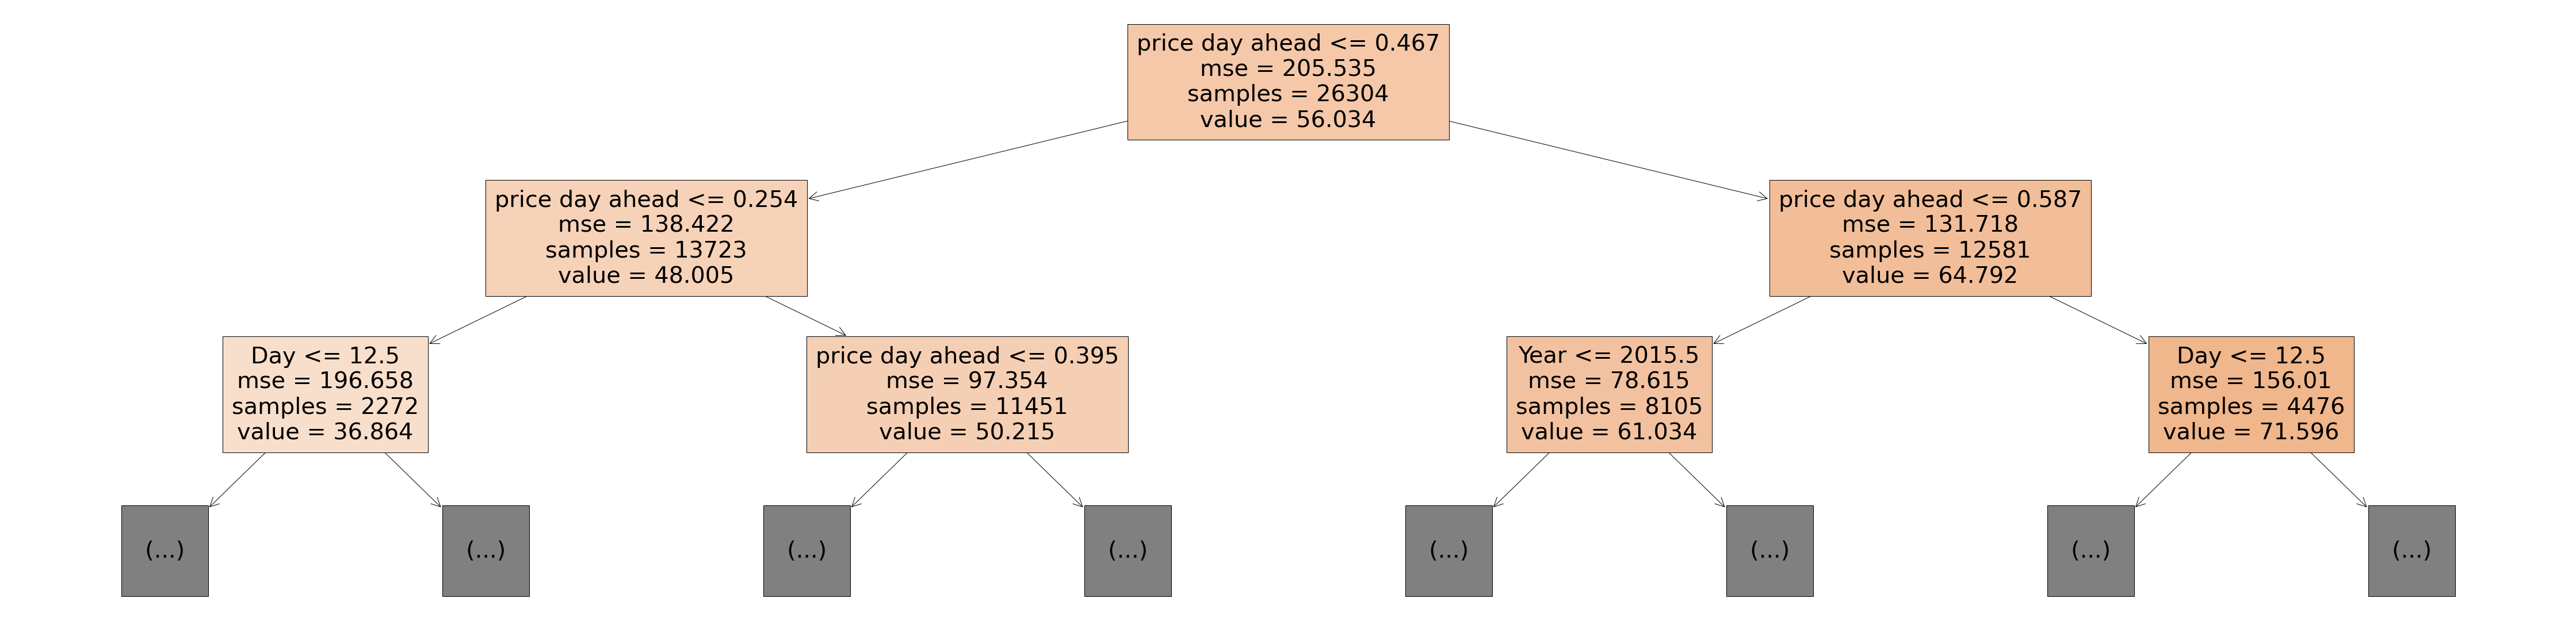

In [81]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [82]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [83]:
importance_df.head(10)

feature  importance
24                   price day ahead    0.541099
77                               Day    0.129429
78                        WeekOfYear    0.055878
76                              Year    0.053971
79                             Month    0.036669
80                         dayofweek    0.022812
0                 generation biomass    0.016743
27                          temp_max    0.014051
11  generation hydro water reservoir    0.011263
22               total load forecast    0.011037

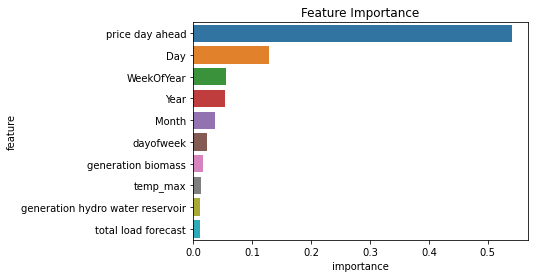

In [84]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [85]:
test_preds = model.predict(X_test)

In [86]:
df = pd.DataFrame({'Real Values':test_targets['price actual'], 'Predicted Values':test_preds})
df

Real Values  Predicted Values
26304        20.76             44.42
26305        19.02             44.42
26306        17.90             44.42
26307        20.88             44.42
26308        18.83             44.42
...            ...               ...
35059        77.02             74.21
35060        76.16             74.21
35061        74.30             74.72
35062        69.89             74.72
35063        69.88             74.72

[8760 rows x 2 columns]

In [87]:
mean_squared_error(test_targets, test_preds, squared=False)

10.868977736814948

In [88]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aroraarjun1996/elctrical-demand-price-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction


'https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction'

In [89]:
#Training the same decision tree regressor with different hyperparameters


In [90]:
model = DecisionTreeRegressor(max_depth=3, random_state=42)

In [91]:
model.fit(X_train, train_targets)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [92]:
model.score(X_train, train_targets)

0.5718987198867294

In [93]:
model.score(X_test, test_targets)

0.40747433364707786

In [94]:
def max_depth_error(md):
    model = DecisionTreeRegressor(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    test_acc = 1 - model.score(X_test, test_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Test Error': test_acc}

In [95]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [96]:
errors_df

Max Depth  Training Error  Test Error
0           1        0.657870    0.758367
1           2        0.535862    0.616905
2           3        0.428101    0.592526
3           4        0.357675    0.624277
4           5        0.294759    0.582226
5           6        0.232137    0.651887
6           7        0.173741    0.723132
7           8        0.128195    0.657564
8           9        0.094600    0.757776
9          10        0.069471    0.816999
10         11        0.050315    0.766717
11         12        0.035327    0.742023
12         13        0.024100    0.776915
13         14        0.015847    0.789775
14         15        0.009791    0.809978
15         16        0.006046    0.892010
16         17        0.003697    0.828144
17         18        0.002296    0.834500
18         19        0.001425    0.786141
19         20        0.000823    0.886494

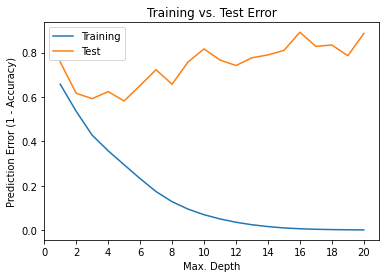

In [97]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Test Error'])
plt.title('Training vs. Test Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Test'])

In [98]:
model = DecisionTreeRegressor(max_leaf_nodes=128, random_state=42)

In [99]:
model.fit(X_train, train_targets)

DecisionTreeRegressor(max_leaf_nodes=128, random_state=42)

In [100]:
model.score(X_train, train_targets)

0.8713171194653384

In [101]:
model.score(X_test, test_targets)

0.3611121004519039

In [102]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aroraarjun1996/elctrical-demand-price-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction


'https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction'

# Random forrest

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [105]:
%%time
model.fit(X_train, train_targets)

<timed eval>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Wall time: 11.3 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [106]:
model.score(X_train, train_targets)

0.9942353641491263

In [107]:
model.score(X_test, test_targets)

0.4327812492356149

In [108]:
X_test

generation biomass  generation fossil brown coal/lignite  \
26304            0.476351                                   0.0   
26305            0.464527                                   0.0   
26306            0.469595                                   0.0   
26307            0.469595                                   0.0   
26308            0.471284                                   0.0   
...                   ...                                   ...   
35059            0.501689                                   0.0   
35060            0.500000                                   0.0   
35061            0.493243                                   0.0   
35062            0.494932                                   0.0   
35063            0.489865                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
26304                                 0.0               0.173255   
26305                                 0.0               0.163173   
26306                                 0.0               0.176750   
26307                                 0.0               0.172207   
26308                                 0.0               0.165618   
...                                   ...                    ...   
35059                                 0.0               0.381052   
35060                                 0.0               0.361436   
35061                                 0.0               0.350654   
35062                                 0.0               0.327543   
35063                                 0.0               0.345712   

       generation fossil hard coal  generation fossil oil  \
26304                     0.119153               0.432071   
26305                     0.114727               0.425390   
26306                     0.121306               0.425390   
26307                     0.124776               0.425390   
26308                     0.127168               0.425390   
...                            ...                    ...   
35059                     0.314392               0.396437   
35060                     0.306975               0.387528   
35061                     0.289748               0.374165   
35062                     0.274315               0.363029   
35063                     0.259122               0.363029   

       generation fossil oil shale  generation fossil peat  \
26304                          0.0                     0.0   
26305                          0.0                     0.0   
26306                          0.0                     0.0   
26307                          0.0                     0.0   
26308                          0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage consumption  \
26304                    0.0                                     0.462967   
26305                    0.0                                     0.467610   
26306                    0.0                                     0.450365   
26307                    0.0                                     0.470042   
26308                    0.0                                     0.570418   
...                      ...                                          ...   
35059                    0.0                                     0.000221   
35060                    0.0                                     0.000221   
35061                    0.0                                     0.011055   
35062                    0.0                                     0.023878   
35063                    0.0                                

# Xgboost and Light GBM

In [168]:
X_train['WeekOfYear'] = X_train['WeekOfYear'].astype('int32')
X_test['WeekOfYear'] = X_test['WeekOfYear'].astype('int32')


In [159]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [160]:
from xgboost import XGBRegressor, plot_importance, plot_tree
import lightgbm

In [161]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [162]:
%%time
model.fit(X_train, train_targets)

Wall time: 410 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
preds = model.predict(X_train)

In [164]:
preds

array([41.840214, 41.62673 , 41.62673 , ..., 39.221638, 30.01689 ,
       30.31719 ], dtype=float32)

In [165]:
mean_squared_error(preds, train_targets, squared=False)

3.876930131211783

In [170]:
test_preds = model.predict(X_test)
mean_squared_error(test_preds, test_targets, squared=False)

C:\Users\a.arora\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



9.913511252074736

In [116]:
pip install xdot

Note: you may need to restart the kernel to use updated packages.


In [117]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
import graphviz
%matplotlib inline

rcParams['figure.figsize'] = 30,30

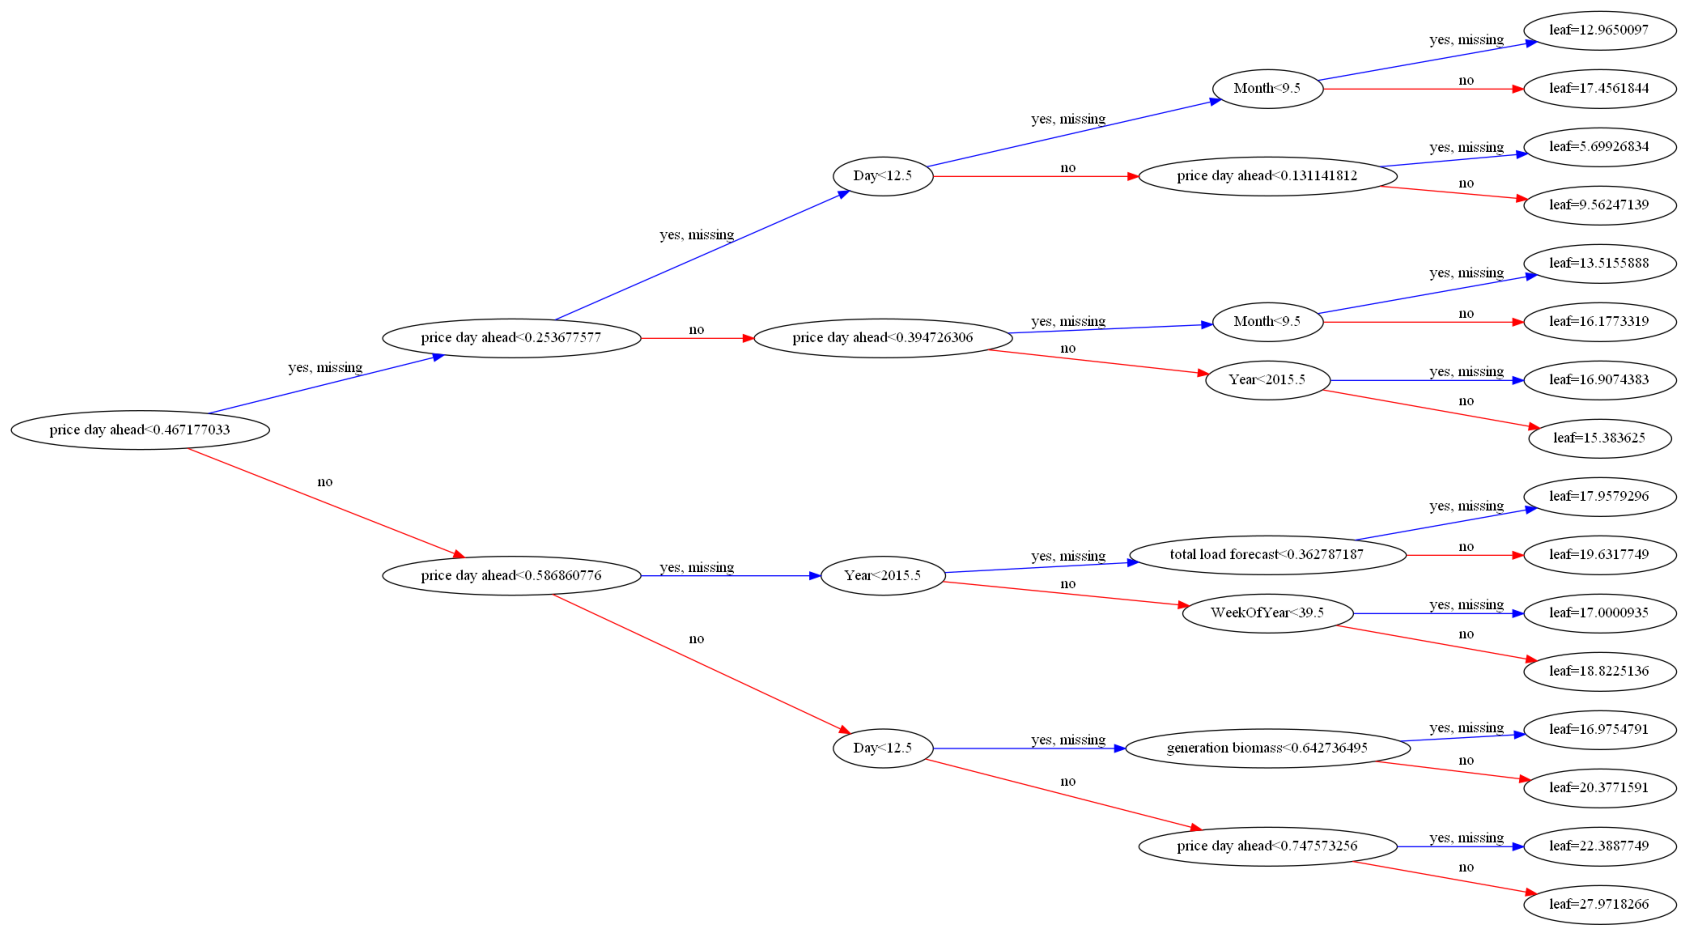

In [120]:
plot_tree(model, rankdir='LR');

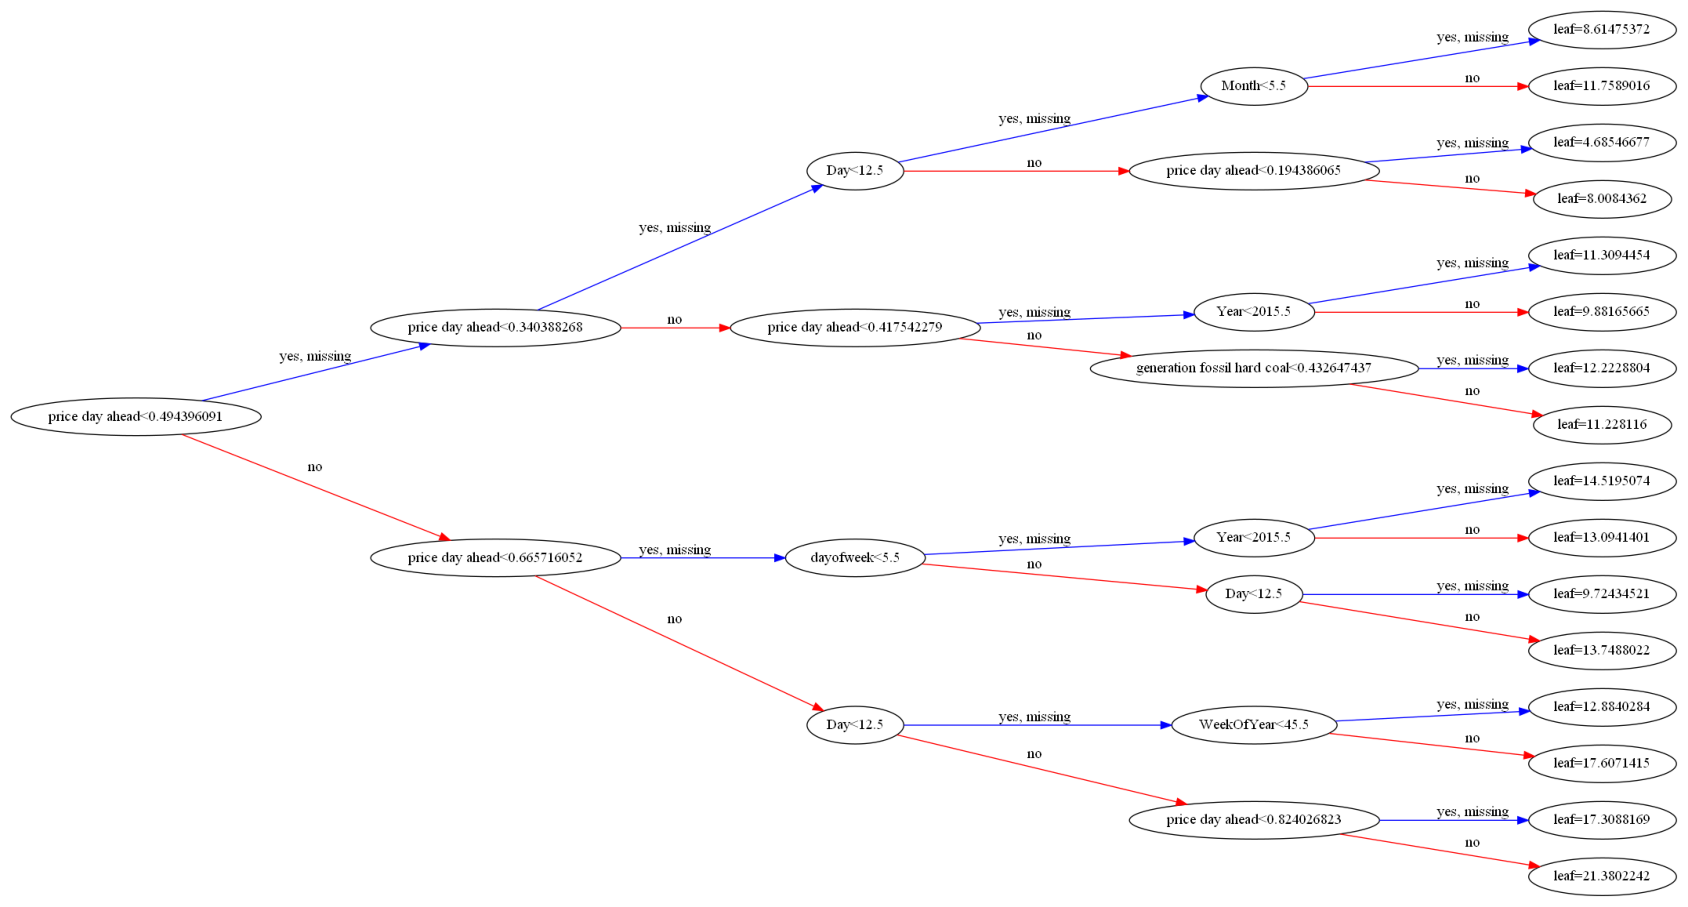

In [121]:
plot_tree(model, rankdir='LR' , num_trees=1);

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

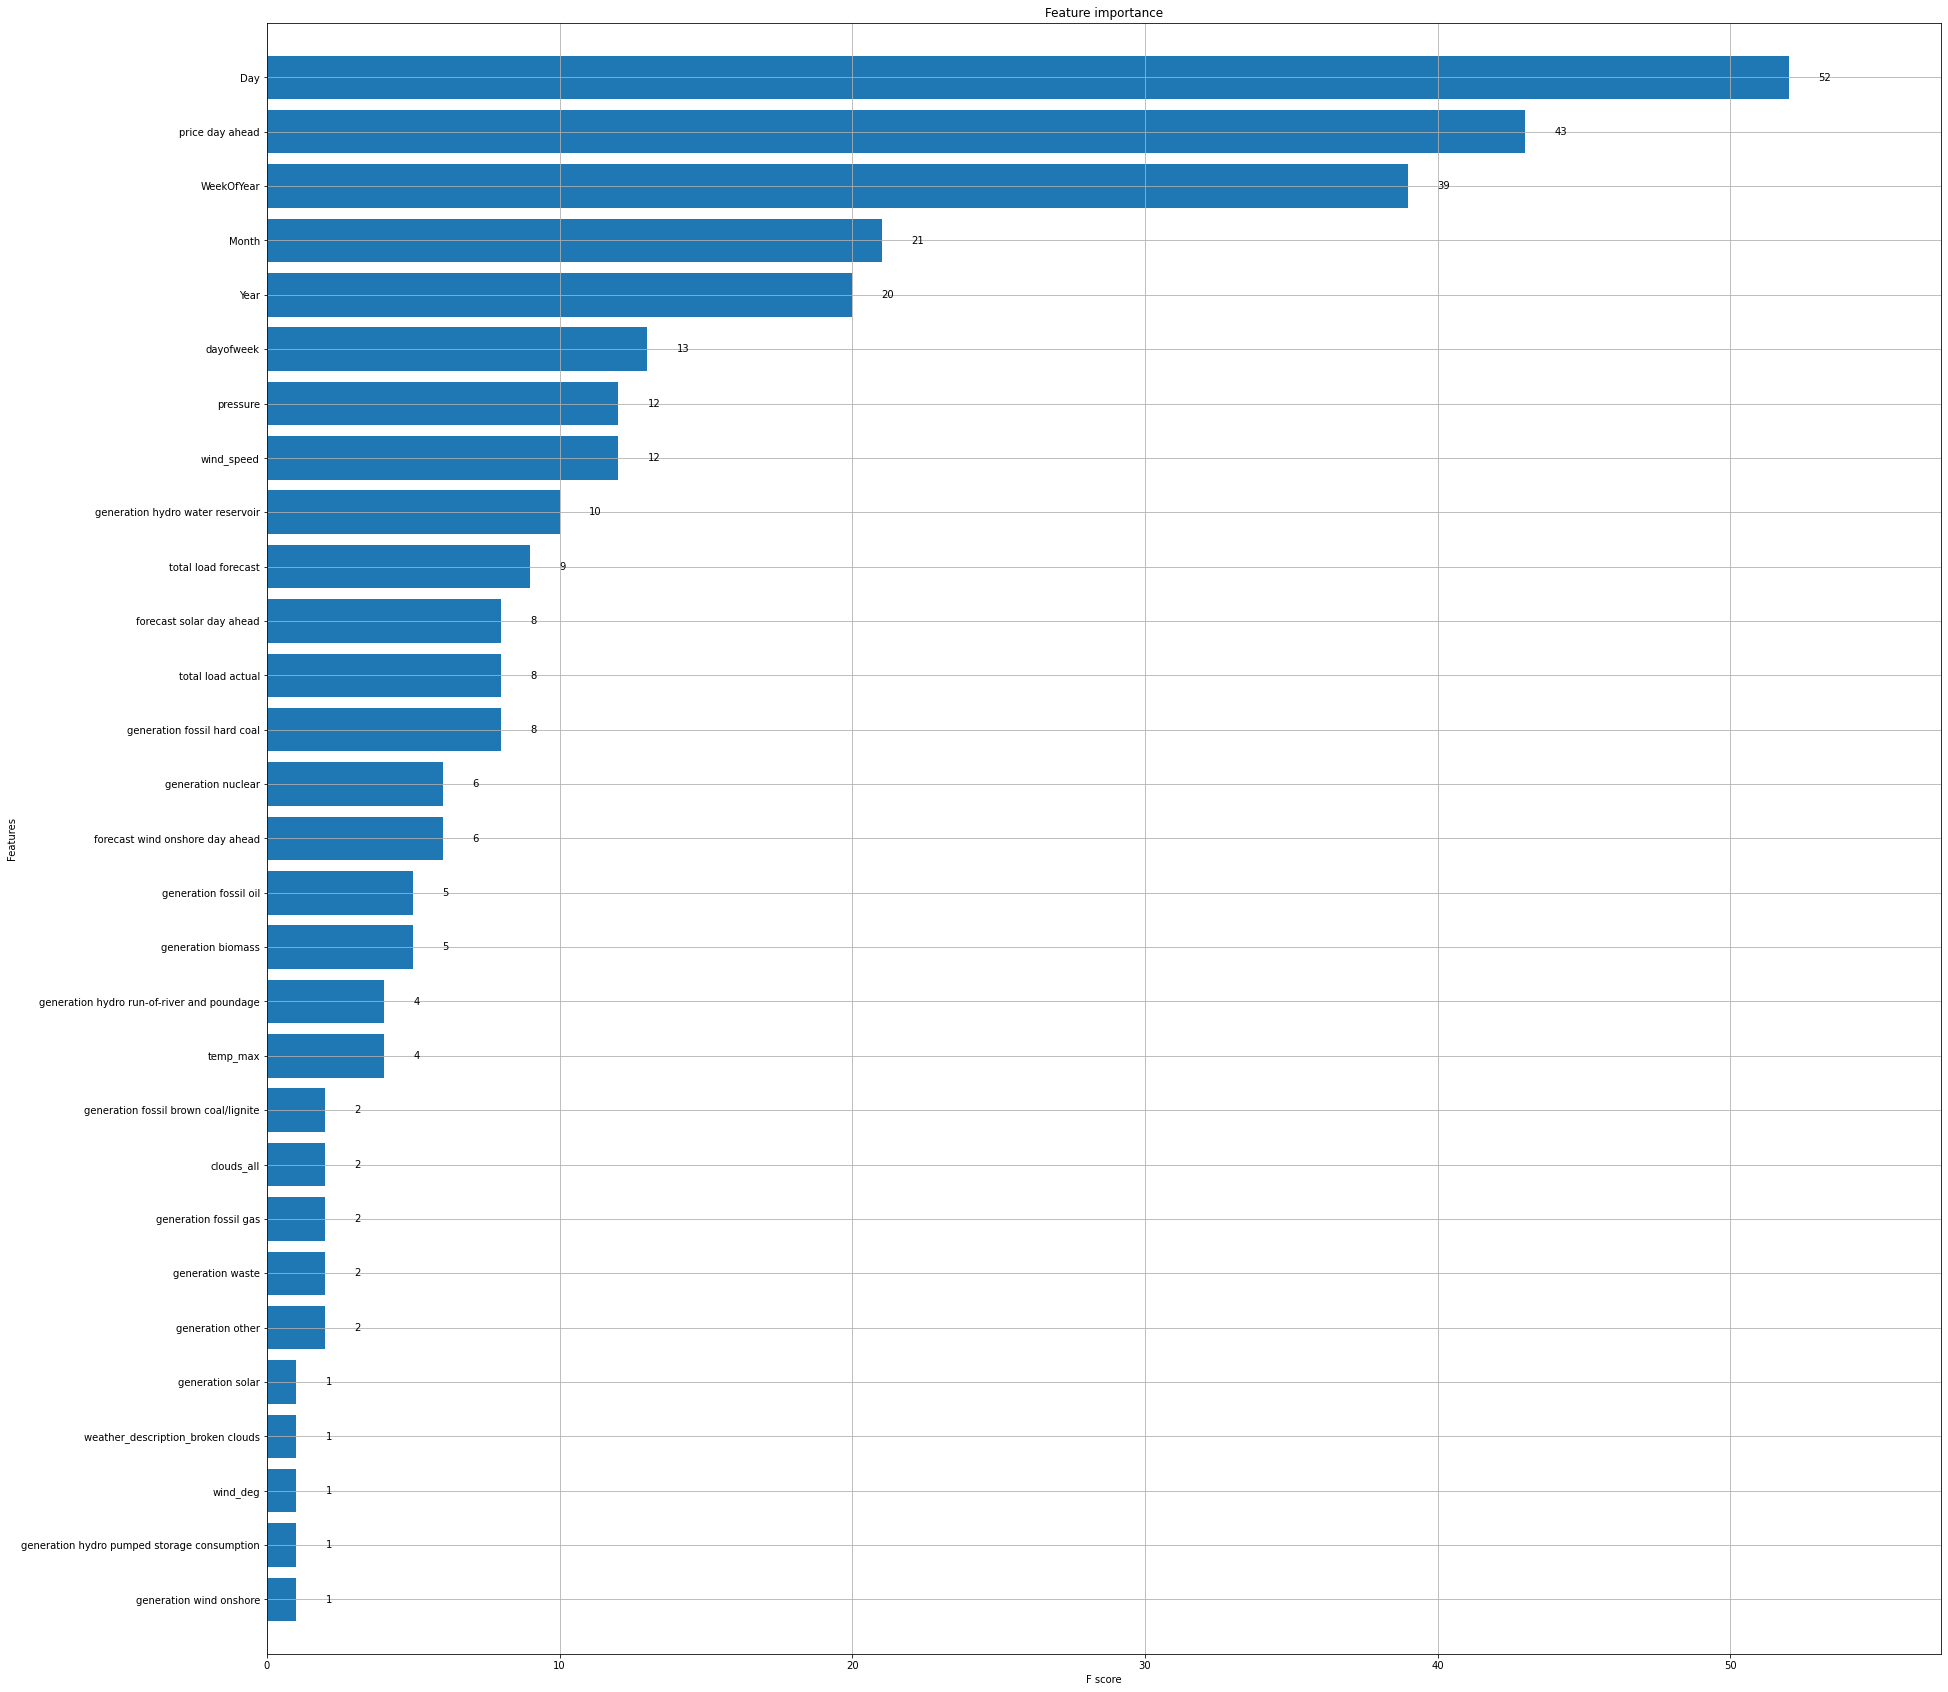

In [127]:
plot_importance(booster=model,
                height=0.8)

In [128]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [129]:
importance_df.head(10)

feature  importance
24          price day ahead    0.323831
76                     Year    0.066003
77                      Day    0.063663
79                    Month    0.060962
19  generation wind onshore    0.045735
14         generation other    0.042932
80                dayofweek    0.039601
22      total load forecast    0.034707
0        generation biomass    0.033142
78               WeekOfYear    0.033006

In [171]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [183]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=5)

In [184]:
%%time
model.fit(X_train, train_targets)

Wall time: 418 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [185]:
preds = model.predict(X_train)

C:\Users\a.arora\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [186]:
rmse(preds, train_targets)

3.1993672932380366

In [187]:
test_preds = model.predict(X_test)
rmse(test_preds, test_targets)

C:\Users\a.arora\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



9.393662954762535

In [195]:
compare_df = pd.DataFrame({"actual": test_targets['price actual'], "prediction_price" : test_preds})

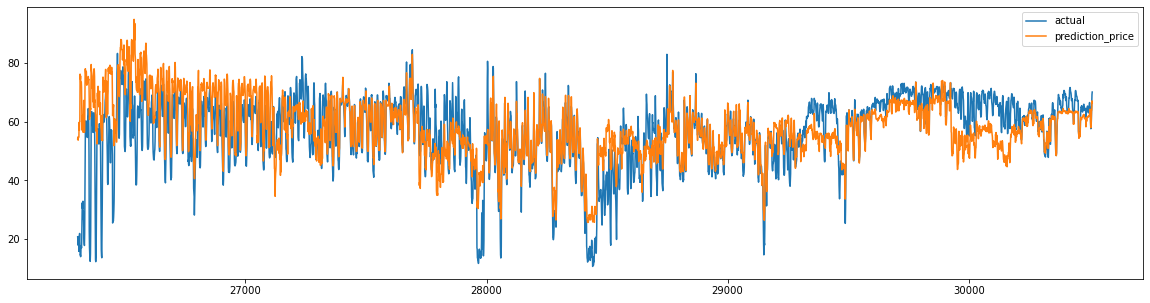

In [196]:
compare_df[["actual","prediction_price"]].plot(figsize=(20,5));


Light GBM


In [197]:
from lightgbm import LGBMRegressor, plot_importance, plot_tree

In [198]:
model = LGBMRegressor(random_state=42)

In [199]:
model.fit(X_train, train_targets)

LGBMRegressor(random_state=42)

In [200]:
train_preds = model.predict(X_train)

In [201]:
rmse(train_preds, train_targets)

2.322617414308489

In [202]:
test_preds = model.predict(X_test)

In [203]:
rmse(test_preds, test_targets)

9.302034256005104

In [205]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [207]:
importance_df.head(10)

feature  importance
77                                         Day         305
78                                  WeekOfYear         293
24                             price day ahead         238
80                                   dayofweek         142
4                  generation fossil hard coal         117
5                        generation fossil oil         117
20                    forecast solar day ahead         115
28                                    pressure         108
10  generation hydro run-of-river and poundage         107
11            generation hydro water reservoir          97

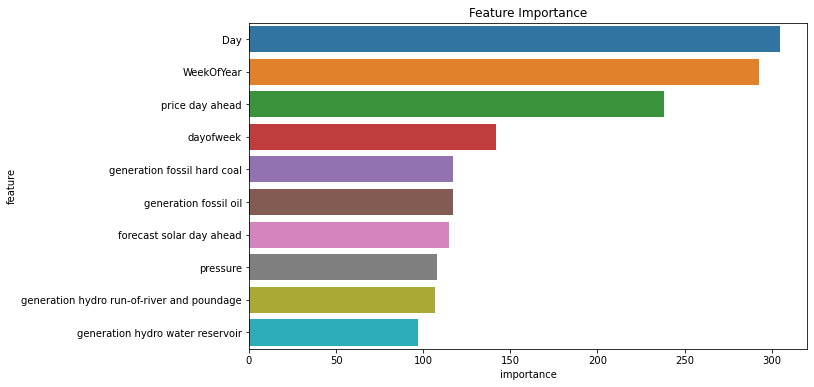

In [208]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [209]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aroraarjun1996/elctrical-demand-price-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction


'https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction'

Modifying the hyperparamaters of Light GBM

In [211]:
import lightgbm

In [220]:
model = LGBMRegressor(n_estimators=10, random_state=42).fit(X_train, train_targets)

In [ ]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [221]:
rmse(train_preds, train_targets), rmse(test_preds, test_targets)

(7.004253297212399, 9.781385602781379)

In [222]:
model = LGBMRegressor(n_estimators=100, random_state=42).fit(X_train, train_targets)

In [223]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [224]:
rmse(train_preds, train_targets), rmse(test_preds, test_targets)

(2.322617414308489, 9.302034256005104)

Max depth or number of leaves

In [267]:
model = LGBMRegressor(max_depth=8, random_state=42, learning_rate=0.1).fit(X_train, train_targets)

In [265]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [266]:
rmse(train_preds, train_targets), rmse(test_preds, test_targets)

(5.638220559289691, 9.530564471278906)

In [277]:
model = LGBMRegressor(boosting_type='gbdt', random_state=42, max_depth=8).fit(X_train, train_targets)

In [278]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [279]:
rmse(train_preds, train_targets), rmse(test_preds, test_targets)

(2.403561297082526, 9.139572399056481)

In [283]:
model = LGBMRegressor(num_leaves=128, random_state=42, max_depth=8).fit(X_train, train_targets)

In [284]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [285]:
rmse(train_preds, train_targets), rmse(test_preds, test_targets)

(1.5576660331966632, 9.489422550124692)

Best training model with hyper parameters
model = LGBMRegressor(num_leaves=128, random_state=42, max_depth=8).fit(X_train, train_targets)

Best train-test model with hyper parameters
model = LGBMRegressor(boosting_type='gbdt', random_state=42, max_depth=8).fit(X_train, train_targets)

In [286]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aroraarjun1996/elctrical-demand-price-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction


'https://jovian.ai/aroraarjun1996/elctrical-demand-price-prediction'

In [287]:
#Show sample predictions

In [308]:
sample_df = pd.read_csv("energy-consumption-generation-prices-and-weather/sample_input.csv")

In [309]:
sample_df

time  generation biomass  \
0  2015-01-05 02:00:00+01:00                 359   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                     0                                   0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                   4791                         2580                    311   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                            0                       0                      0   

   generation hydro pumped storage aggregated  \
0                                         NaN   

   generation hydro pumped storage consumption  \
0                                         1021   

   generation hydro run-of-river and poundage  \
0                                        1076   

   generation hydro water reservoir  generation marine  generation nuclear  \
0                              2140                  0                4028   

   generation other  generation other renewable  generation solar  \
0                38                          75               662   

   generation waste  generation wind offshore  generation wind onshore  \
0               156                         0                     7887   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                       566                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                             7731                22590              21988   

   price day ahead     temp  temp_min  temp_max  pressure  humidity  \
0             35.2  271.258   271.258   271.258       970        67   

   wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  weather_id  \
0           1        24        0        0        0           0         800   

  weather_main weather_description weather_icon  
0        clear        sky is clear          01n

In [310]:
sample_df.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'],axis = 1, inplace=True)

In [311]:
#Time columns modification functions
sample_df.rename(columns={'time' : 'datetime'}, inplace=True)

sample_df[['time', 'timezone']] = sample_df['datetime'].str.split("+", expand=True)
sample_df[['date', 'time_hours']] = sample_df['time'].str.split(" ", expand=True)
split_date(sample_df)
del sample_df['datetime']

In [312]:
sample_df[numeric_cols] = scaler.transform(sample_df[numeric_cols])
sample_df[encoded_cols] = encoder.transform(sample_df[categorical_cols[-2:]])
sample_df = sample_df[numeric_cols + encoded_cols + categorical_cols[:-2]]


In [ ]:
sample_df['WeekOfYear'] = sample_df['WeekOfYear'].astype('int32')

In [316]:
model.predict(sample_df)

array([45.41434011])

In [317]:
print("Actual: 60.91 - prediction 45.41")

Actual: 60.91 - prediction 45.41


In [327]:
sample_2_df = pd.read_csv("energy-consumption-generation-prices-and-weather/sample_2.csv")

In [328]:
sample_2_df

time  generation biomass  \
0  2015-01-05 02:00:00+01:00                 359   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                     0                                   0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                   4791                         2580                    311   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                            0                       0                      0   

   generation hydro pumped storage aggregated  \
0                                         NaN   

   generation hydro pumped storage consumption  \
0                                         1021   

   generation hydro run-of-river and poundage  \
0                                        1076   

   generation hydro water reservoir  generation marine  generation nuclear  \
0                              2140                  0                4028   

   generation other  generation other renewable  generation solar  \
0                38                          75               662   

   generation waste  generation wind offshore  generation wind onshore  \
0               156                         0                     7887   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                       566                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                             7731                22590              21988   

   price day ahead    temp  temp_min  temp_max  pressure  humidity  \
0             35.2  289.55    289.55    289.55      1026        64   

   wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  weather_id  \
0           1       157        0        0        0          12         801   

  weather_main weather_description weather_icon  
0       clouds          few clouds          02d

In [329]:
sample_2_df.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'],axis = 1, inplace=True)
#Time columns modification functions
sample_2_df.rename(columns={'time' : 'datetime'}, inplace=True)

sample_2_df[['time', 'timezone']] = sample_2_df['datetime'].str.split("+", expand=True)
sample_2_df[['date', 'time_hours']] = sample_2_df['time'].str.split(" ", expand=True)
split_date(sample_2_df)
del sample_2_df['datetime']

sample_2_df[numeric_cols] = scaler.transform(sample_2_df[numeric_cols])
sample_2_df[encoded_cols] = encoder.transform(sample_2_df[categorical_cols[-2:]])
sample_2_df = sample_2_df[numeric_cols + encoded_cols + categorical_cols[:-2]]


In [330]:
sample_2_df['WeekOfYear'] = sample_2_df['WeekOfYear'].astype('int32')

<ipython-input-330-96229b51e0b5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [331]:
model.predict(sample_2_df)

array([46.51662526])

# Saving the trained models

In [333]:
import joblib

In [336]:
energy_price = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [337]:
joblib.dump(energy_price, 'energy_price.joblib')

['energy_price.joblib']

In [338]:
energy_model = joblib.load('energy_price.joblib')

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

# Summary and references

The following Kaggle dataset was used in this notebook:
https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather

The data consists of 29 columns in energy dataset, and 17 columns in weather dataset
It also has 35k tuples in energy dataset plus 178k tuples in weather dataset
We have trained the model on Madrid weather and corresponding hourly energy generations. variables like price day ahead and what day of the month it is, day of week, had huge feature importances. Weather conditions affect the prices a lot too.

I have trained a decision tree regressor, Gradient boosting model and Light GBM model in this notebook. I have also done some regularization and hyperparameter tuning to reduce overfitting and imporve test accuracy.

The best model was Light GBM with boosting_type='gbdt' and max_depth of 8 low training time, overall accuracy of (2.403561297082526, 9.139572399056481) for train and test respectively for corresponding prices.


